In [78]:
%matplotlib inline

In [79]:
# Imports the Google Cloud client library
from google.cloud import datastore
import datetime

# Instantiates a client
datastore_client = datastore.Client()

start_time = datetime.datetime.now() - datetime.timedelta(days=3)
q = datastore_client.query(kind='TemperatureRecord')
q.add_filter('time', '>', start_time)

data = list(q.fetch())

In [80]:
len(data)

4440

In [81]:
origdata = data.copy()
data[1]

<Entity('TemperatureRecord', 5179716977819648) {'temp': 17.75, 'time': datetime.datetime(2018, 4, 5, 9, 26, 22, 786000, tzinfo=<UTC>)}>

In [82]:
data[1]['time']

datetime.datetime(2018, 4, 5, 9, 26, 22, 786000, tzinfo=<UTC>)

In [83]:
import pandas as pa

In [84]:
df = pa.DataFrame(data)

In [85]:
df.head()

,temp,time
0,17.6875,2018-04-05 09:25:22.189000+00:00
1,17.7500,2018-04-05 09:26:22.786000+00:00
2,17.7500,2018-04-05 09:27:24.071000+00:00
3,17.7500,2018-04-05 09:28:25.360000+00:00
4,17.7500,2018-04-05 09:29:26.685000+00:00


In [86]:
import pytz

In [87]:
tz = pytz.timezone('America/Los_Angeles')

In [88]:
df.time = df.time.map(lambda t: t.astimezone(tz))

In [89]:
df.temp = df.temp.map(lambda c: 9/5. * c + 32.)

In [90]:
import seaborn as sns

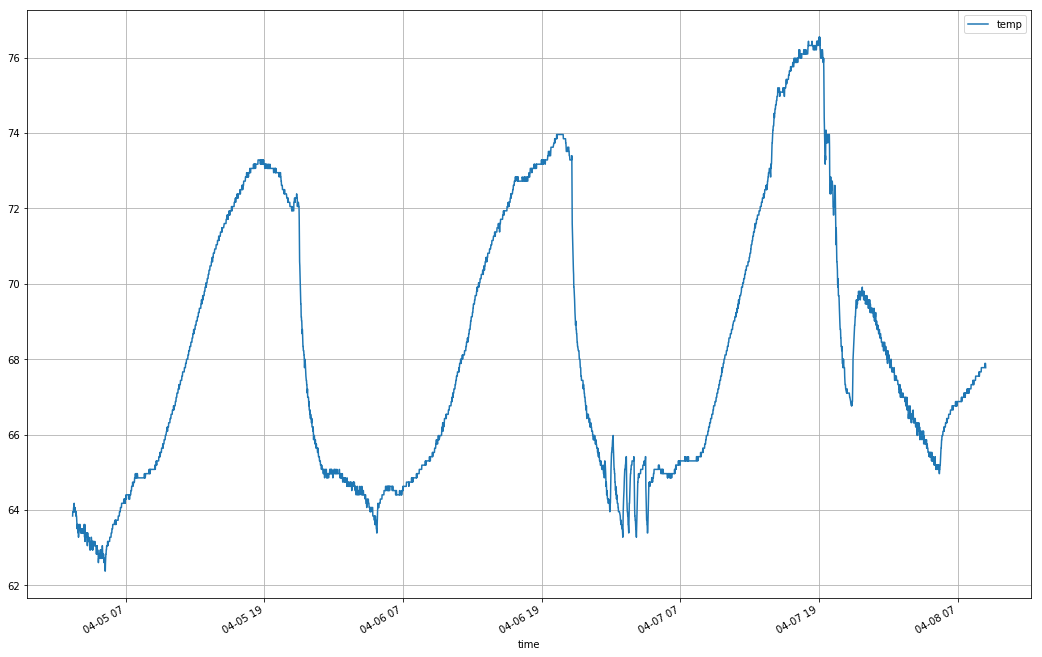

In [91]:
df.sort_values(by='time').iloc[:].plot.line(x='time', y='temp', figsize=(18,12), grid=True)

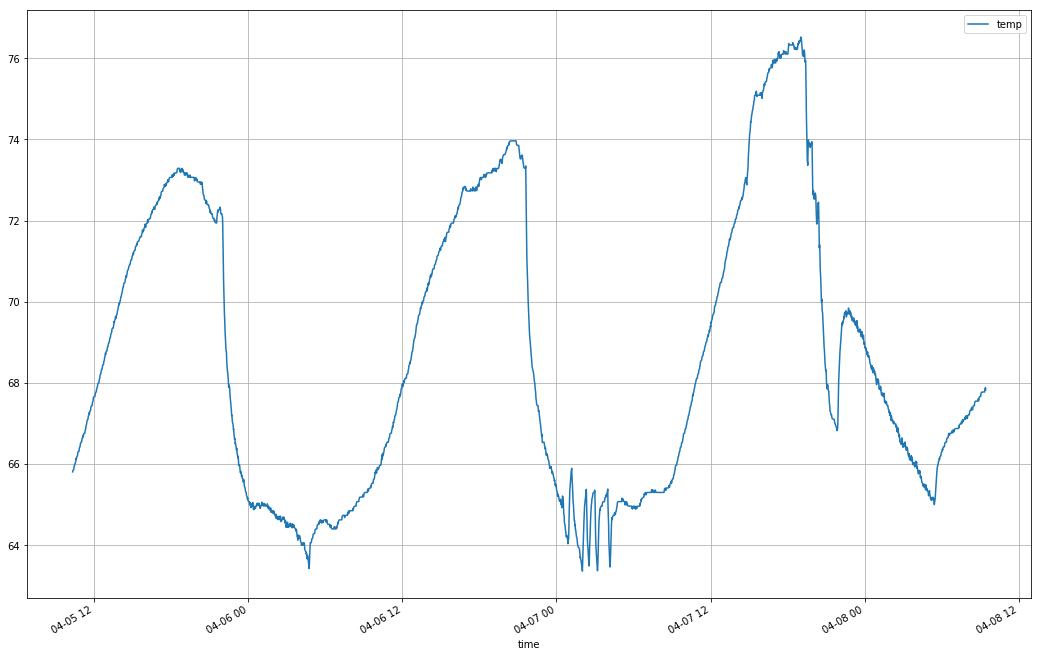

In [92]:
x = df.sort_values(by='time').copy()
x.temp = x.temp.ewm(alpha=0.5).mean()
x.iloc[-4000:].plot.line(x='time', y='temp', figsize=(18,12), grid=True)